In [5]:
import sympy as sym
import numpy as np
import pandas as pd
from IPython.display import display, Math
import matplotlib.pyplot as plt
from IPython.display import Image

## Datos especificaciones sensor de cie
![title](datosSensor_1.png)

## Datos curva sensor de cie
![title](datosSensor_2.png)

### Equacion de una linea recta
#### f(x) = mx +b
##### Segun las especificaciones tecnicas.
- 90% del voltaje --> 500bar 
- 10% del voltaje --> 0bar
- Si tenemos 5 voltios de rango de medicion de la tarjeta analogica:
- 90% --> 4.5V
- 10% --> 0.5V

##### En el PLC de Cie Norma, tenemos dos tarjetas analogicas. Una que mide la presion de entrada desde el Calimero y otra que mide la presion del sensor. Si sabemos la presion de entrada y la pendiente o rampa 'm' de la curva caracteristica del sensor, podemos calcular su voltaje de salida teorico, utilizando la formula de la linea recta.
 - f(x) = mx + b . La funcion de x, es igual a la pendiente multiplicada por x y mas una constante.
 - b en porcentaje seria %10 (valor del voltaje de salida porcentual) cuando la recta intercepta el eje de ordenadas cuando x es igual a 0.
 - b en porcentaje seria 0.5V (valor del voltaje de salida) cuando la recta intercepta el eje de ordenadas cuando x es igual a 0.

In [64]:
rangoPresion = np.arange(0, 501, 0.5)
x = sym.symbols('x')
#--------------------------------------
m_porcentaje = (90 - 10) / (500 - 0)
b_porcentaje = 10
fx_porcentaje = (m_porcentaje * x) + b_porcentaje
data_porcentaje_y = [fx_porcentaje.subs(x, i) for i in rangoPresion]
#--------------------------------------
m_voltaje = (4.5 - 0.5) / (500 - 0 )
b_voltaje = 0.5
fx_voltaje = (m_voltaje * x) + b_voltaje 
data_voltaje_y = [fx_voltaje.subs(x, i) for i in rangoPresion]
#--------------------------------------


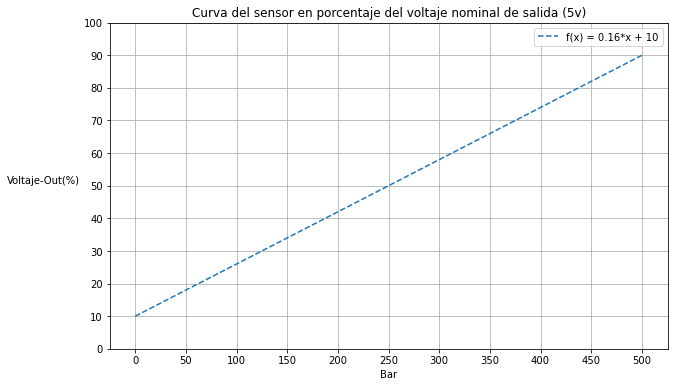

In [97]:
fig= plt.figure(figsize=(10,6))
plt.plot(rangoPresion, data_porcentaje_y, linestyle='dashed', label = ('f(x) = %s*x + %s' %(m_porcentaje,b_porcentaje)))
plt.grid()

#plt.xlim(0, 550)
#plt.ylim(0, 100)
plt.title('Curva del sensor en porcentaje del voltaje nominal de salida (5v)')
plt.xlabel('Bar')
plt.ylabel('Voltaje-Out(%)', rotation=0, labelpad=40)
plt.xticks(np.arange(0,550, 50))
plt.yticks(np.arange(0, 110, 10))

plt.legend()
plt.show()

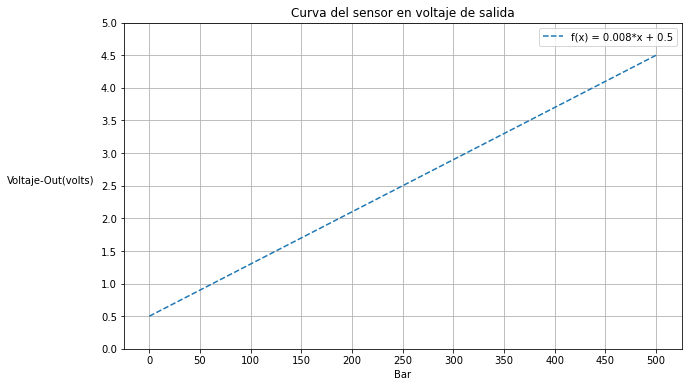

In [98]:
fig= plt.figure(figsize=(10,6))
plt.plot(rangoPresion, data_voltaje_y, linestyle='dashed', label = ('f(x) = %s*x + %s' %(m_voltaje,b_voltaje)))
plt.grid()

#plt.xlim(0, 550)
#plt.ylim(0, 5)
plt.title('Curva del sensor en voltaje de salida')
plt.xlabel('Bar')
plt.ylabel('Voltaje-Out(volts)', rotation=0, labelpad=50)

plt.xticks(np.arange(0,550, 50))
plt.yticks(np.arange(0, 5.5, 0.5))

plt.legend()
plt.show()